In [ ]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [70]:
def lowess_smooth(group, frac=0.8, it=3):
    x = group['episode']
    y = group['rating']
    group['rating_lowess'] = sm.nonparametric.lowess(y, x, frac=frac, return_sorted=False ,it=it)
    return group

# generate normalized episode number for each season on the 0-1 scale
def normalize_episode(group):
    n = len(group)
    if n == 1:  # edge case: season with only 1 episode
        return pd.Series([1.0], index=group.index)
    return 1 + (group['episode'] - 1) / (n - 1)

In [77]:
# load data
data = pd.read_csv('../data/yellowstone_ratings.csv')

# generate normalized episode number for each season on the 0-1 scale
data['episode_norm'] = data.groupby('season').apply(normalize_episode).reset_index(level=0, drop=True) + data['season'] - 1

# apply LOWESS smoothing to ratings within a season
data = data.groupby('season', group_keys=False).apply(lowess_smooth)

# save season endpoints (for vertical lines)
season_endpoints = list(range(2, data['season'].max() + 1))
print(season_endpoints)

# show data
print(data.head(n=20))

[2, 3, 4, 5]
    episode  season  rating  episode_norm  rating_lowess
0         1       1     8.1      1.000000       8.111308
1         2       1     7.8      1.125000       8.085521
2         3       1     8.1      1.250000       8.059720
3         4       1     8.0      1.375000       8.036189
4         5       1     8.0      1.500000       8.019766
5         6       1     8.0      1.625000       8.046157
6         7       1     8.1      1.750000       8.136857
7         8       1     8.2      1.875000       8.236477
8         9       1     8.4      2.000000       8.341826
9         1       2     8.2      2.000000       8.045115
10        2       2     8.0      2.111111       8.081017
11        3       2     7.9      2.222222       8.123944
12        4       2     8.3      2.333333       8.172732
13        5       2     8.1      2.444444       8.275543
14        6       2     8.5      2.555556       8.359024
15        7       2     9.2      2.666667       8.475112
16        8       

/var/folders/kp/zp6jtys507556k_66tb2_hgr0000gn/T/ipykernel_59807/3307840015.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data['episode_norm'] = data.groupby('season').apply(normalize_episode).reset_index(level=0, drop=True) + data['season'] - 1
/var/folders/kp/zp6jtys507556k_66tb2_hgr0000gn/T/ipykernel_59807/3307840015.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('season', group_keys

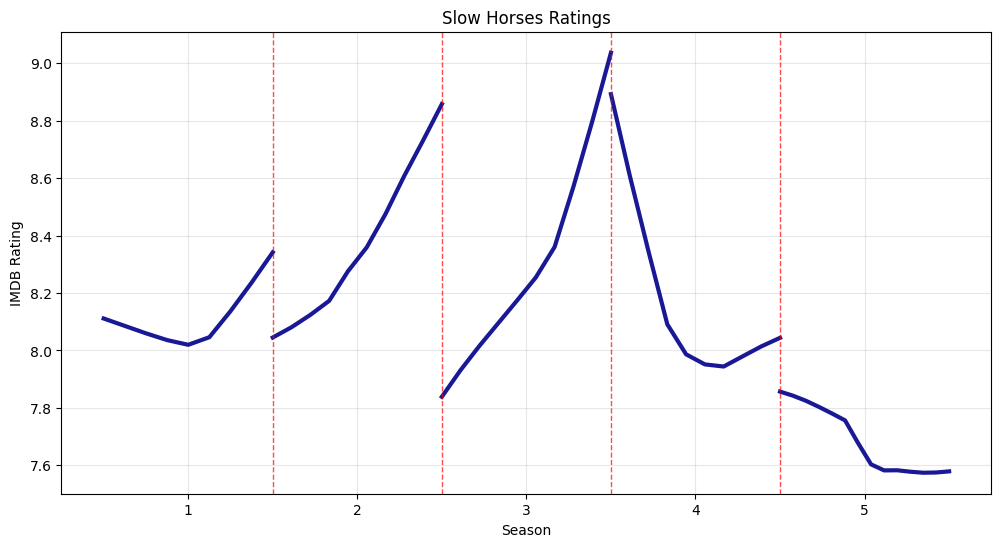

In [78]:

# Create single figure for continuous timeline plotting
plt.figure(figsize=(12, 6))

# Plot each season as a separate line segment with only LOWESS smoothed data
for season in sorted(data['season'].unique()):
    season_data = data[data['season'] == season]

    # Plot smoothed line for this season
    plt.plot(season_data['episode_norm'], season_data['rating_lowess'], 
             linewidth=3, color='darkblue', alpha=0.9)

# Add vertical lines at season boundaries (excluding the last one)
for boundary in season_endpoints:
    plt.axvline(x=boundary, color='red', linestyle='--', alpha=0.7, linewidth=1)

plt.title('Slow Horses Ratings')
plt.xlabel('Season')
plt.ylabel('IMDB Rating')

# Set x-axis labels to show integers only at midpoints
max_season = data['season'].max()
x_ticks = [i + 0.5 for i in range(1, max_season + 1)]
x_labels = [str(i) for i in range(1, max_season + 1)]
plt.xticks(x_ticks, x_labels)

plt.grid(True, alpha=0.3)
plt.show()